c:\Users\Thanh\anaconda3\envs\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Thanh\anaconda3\envs\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Thanh\anaconda3\envs\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Thanh\anaconda3\envs\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak

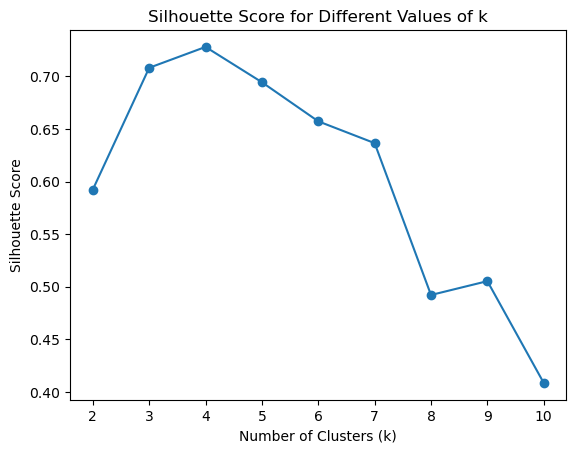

Optimal number of clusters (k): 4


In [17]:
# use to generate a good value for k. silhouette coefficient — a method that calculates the average distance of 
# each point from all other points in a cluster, and then compares that value 
# with the average distance to every point in every other cluster.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

# Generate a synthetic dataset (you can replace this with your own dataset)
X, _ = make_blobs(n_samples=100, centers=5, random_state=42)

# Range of k values to try
k_values = range(2, 11)

# Store silhouette scores for each k
silhouette_scores = []

# Iterate through different values of k
for k in k_values:
    # Fit K-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    
    # Get cluster labels
    labels = kmeans.labels_
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores for different k values
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Values of k')
plt.show()

# Determine the optimal k value based on the maximum silhouette score
optimal_k = k_values[np.argmax(silhouette_scores)]
print('Optimal number of clusters (k):', optimal_k)


Code-book :
 [[3.61813613 4.82418151 2.91998558 1.26491106 1.20604538]
 [1.6080605  4.42216639 0.7570333  2.95145915 2.41209076]] 

Clusters :
 [1 1 1 0] 

No.of.diabetic patients : 3
No.of.non-diabetic patients : 1


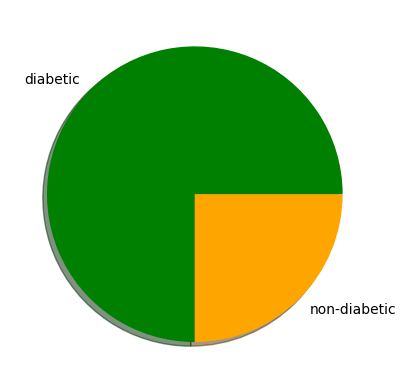

In [18]:
# import modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.cluster.vq import whiten, kmeans, vq

# load the dataset
# observations
dataset = np.array([[1, 3, 4, 5, 2],
				[2, 3, 1, 6, 3],
				[1, 5, 2, 3, 1],
				[3, 4, 9, 2, 1]])


# normalize
dataset = whiten(dataset)

# generate code book
centroids, mean_dist = kmeans(dataset, 2)
print("Code-book :\n", centroids, "\n")

clusters, dist = vq(dataset, centroids)
print("Clusters :\n", clusters, "\n")

# count non-diabetic patients
non_diab = list(clusters).count(0)

# count diabetic patients
diab = list(clusters).count(1)

# depict illustration
x_axis = []
x_axis.append(diab)
x_axis.append(non_diab)

colors = ['green', 'orange']

print("No.of.diabetic patients : " + str(x_axis[0]) +
	"\nNo.of.non-diabetic patients : " + str(x_axis[1]))

y = ['diabetic', 'non-diabetic']

plt.pie(x_axis, labels=y, colors=colors, shadow='true')
plt.show()
